Enter here

<h1>Forecasting number of Air Passengers for next 1 years</h1>

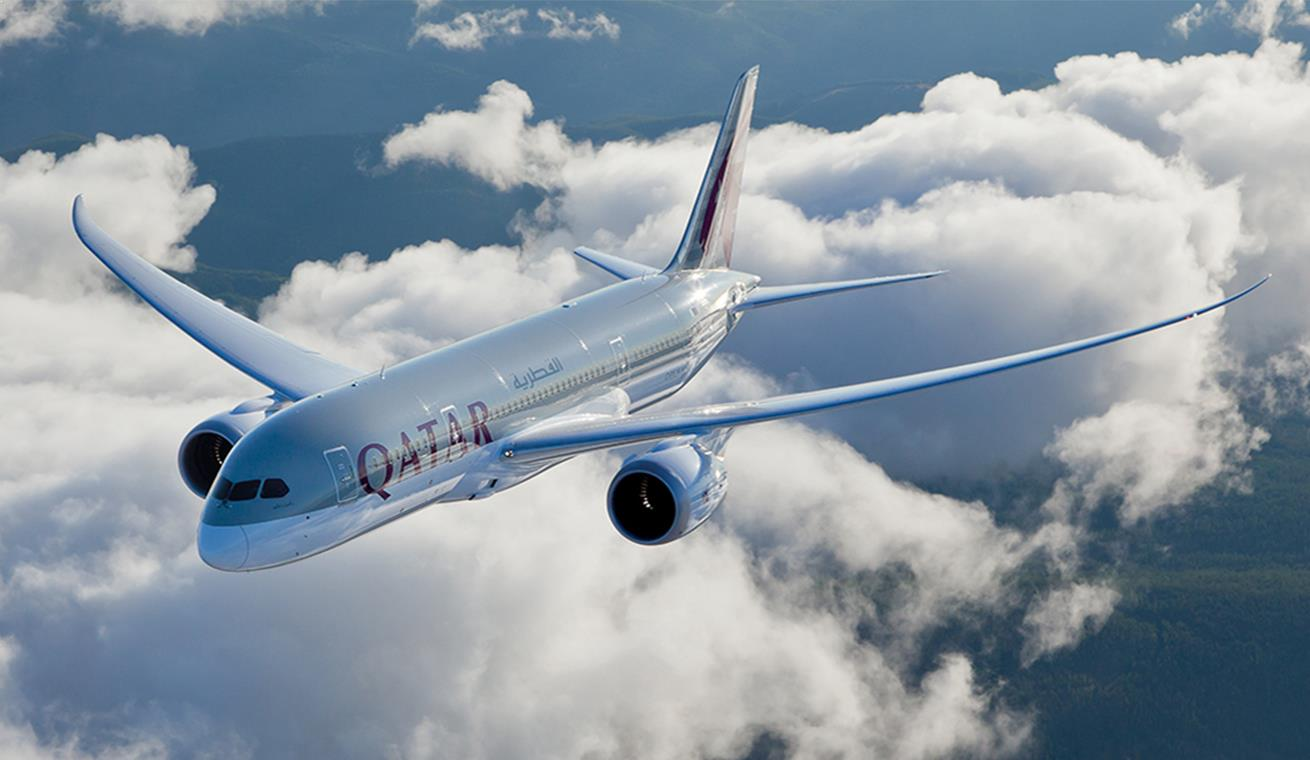

- Importing all the required libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

- Reading the dataset file and checking the size of file

In [2]:
data=pd.read_csv(r'Data\nagapur.csv')
data.shape

(394, 2)

In [3]:
WINDOW_SIZE = 14

- Creating the 'Date' as Index for data and viewing the dataset

In [4]:
data['date']=pd.to_datetime(data['date'], infer_datetime_format=True)
data=data.set_index(['date'])
print(data.head())
print(data.tail())

            weight
date              
2020-02-01    2892
2020-02-02    2143
2020-02-03    2199
2020-02-04    2510
2020-02-05    2702
            weight
date              
2021-02-24    2021
2021-02-25    3083
2021-02-26    3139
2021-02-27    2918
2021-02-28    1814


- Visualizing the Time Series plot for the number of Air Passengers 

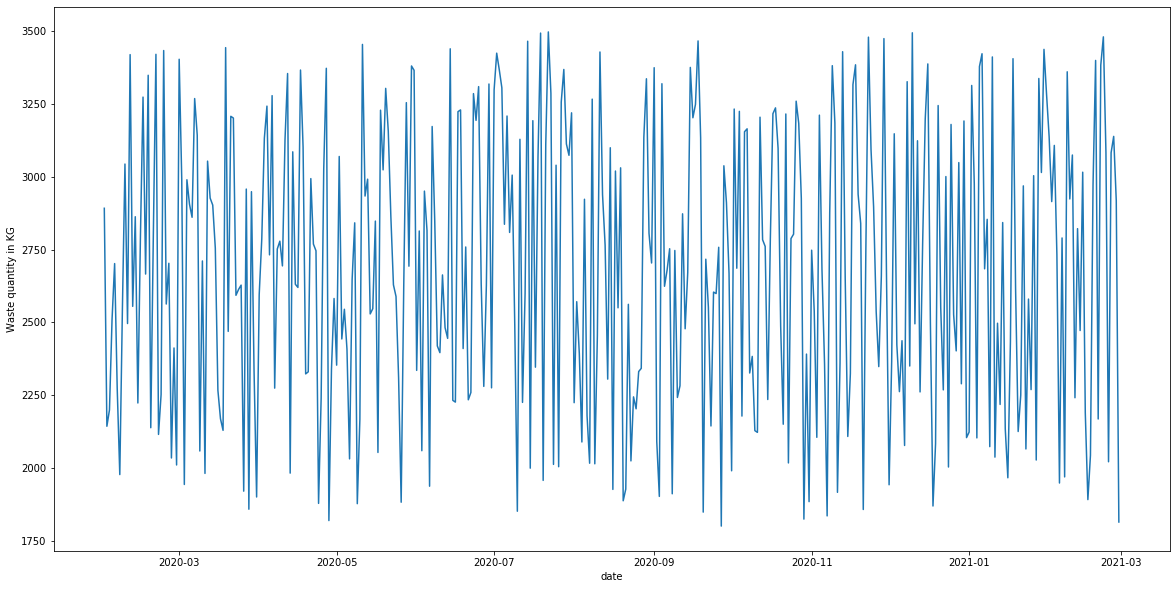

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel("date")
plt.ylabel("Waste quantity in KG")
plt.plot(data)

- As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
- Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [6]:
rolmean=data.rolling(window=WINDOW_SIZE).mean()
rolstd=data.rolling(window=WINDOW_SIZE).std()
print(rolmean.head(15))
print(rolstd.head(15))

                 weight
date                   
2020-02-01          NaN
2020-02-02          NaN
2020-02-03          NaN
2020-02-04          NaN
2020-02-05          NaN
2020-02-06          NaN
2020-02-07          NaN
2020-02-08          NaN
2020-02-09          NaN
2020-02-10          NaN
2020-02-11          NaN
2020-02-12          NaN
2020-02-13          NaN
2020-02-14  2559.785714
2020-02-15  2553.071429
                weight
date                  
2020-02-01         NaN
2020-02-02         NaN
2020-02-03         NaN
2020-02-04         NaN
2020-02-05         NaN
2020-02-06         NaN
2020-02-07         NaN
2020-02-08         NaN
2020-02-09         NaN
2020-02-10         NaN
2020-02-11         NaN
2020-02-12         NaN
2020-02-13         NaN
2020-02-14  396.437051
2020-02-15  391.138273


- Plotting the Rolling Mean and Standard Deviation, which has window of 12
- By looking below plot, we conclude that, it is non-stationary bcoz mean and variance is not constant

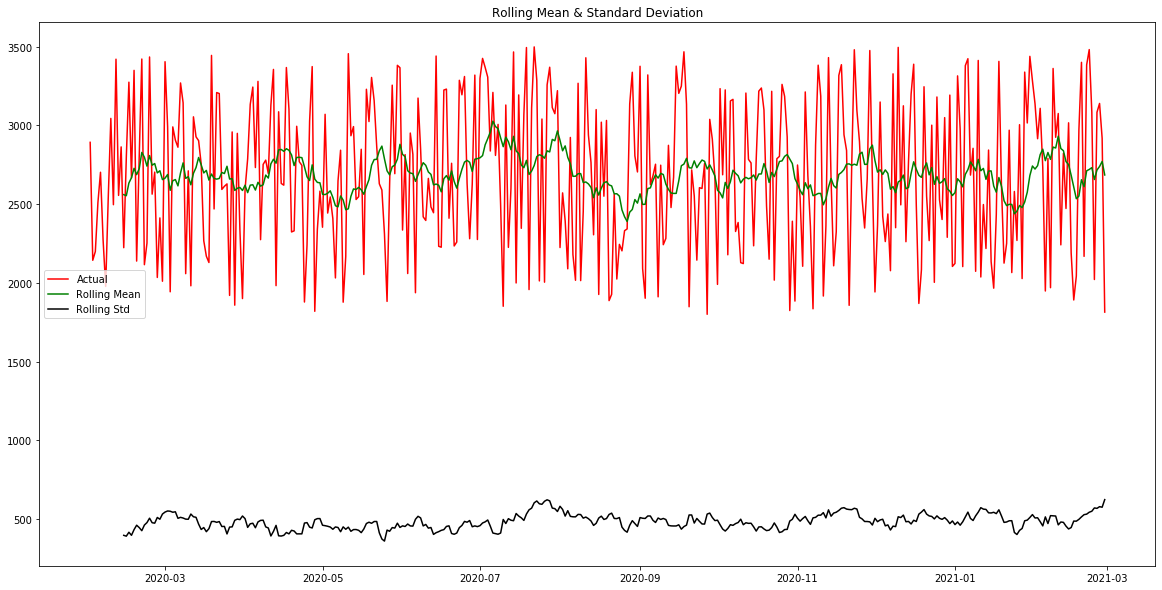

In [7]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
- ADF has : 
<b>Null hypothesis         - Time Series is non-stationary</b>

In [8]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['weight'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic          -20.132745
p-value                   0.000000
Lags Used                 0.000000
No. of Obs              393.000000
Critical Value (1%)      -3.447099
Critical Value (5%)      -2.868923
Critical Value (10%)     -2.570703
dtype: float64


- From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

- Below we took log transformation to make our Time series stationary and plotted visual for it
- We found graph upward trending over time with seasonality 

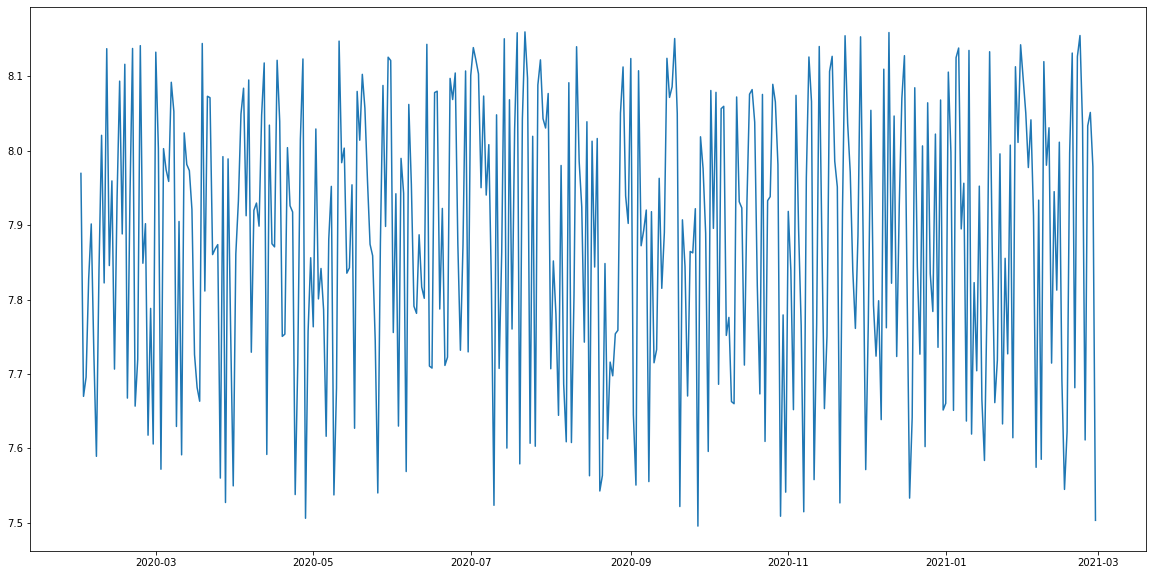

In [9]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

- Testing Rolling Mean with window 12 on above log transformation and concluded non-stationary, again

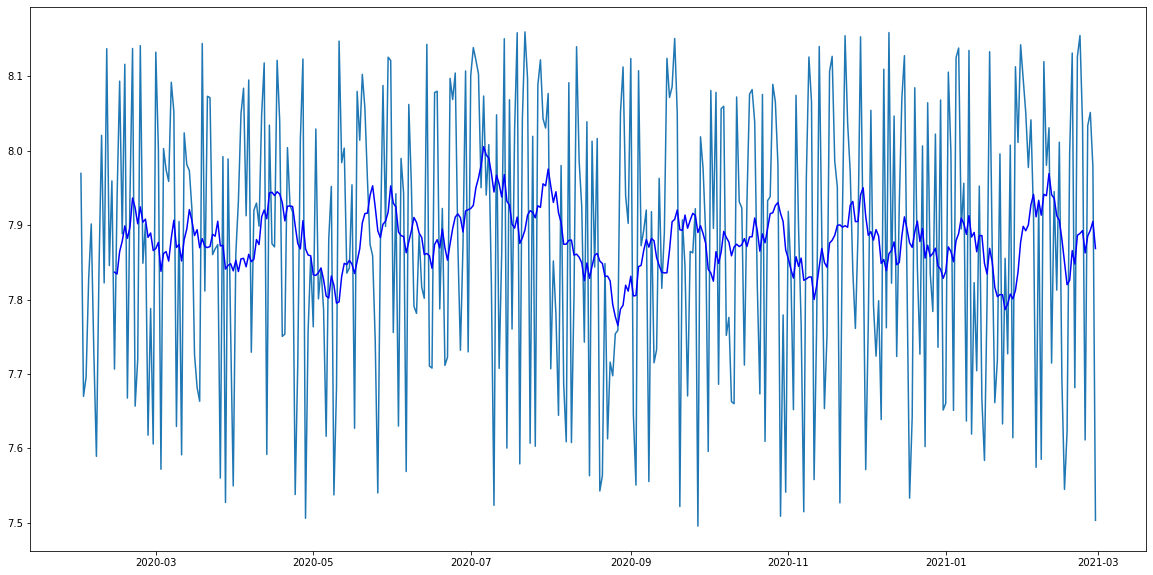

In [10]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=WINDOW_SIZE).mean()
MStd=data_log.rolling(window=WINDOW_SIZE).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

- Using another method differencing, to make our time series stationary

In [11]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

weight
date              
2020-02-01     NaN
2020-02-02     NaN
2020-02-03     NaN
2020-02-04     NaN
2020-02-05     NaN
2020-02-06     NaN
2020-02-07     NaN
2020-02-08     NaN
2020-02-09     NaN
2020-02-10     NaN
2020-02-11     NaN
2020-02-12     NaN

- Output of differencing method, after dropping null values

In [12]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

weight
date                
2020-02-14 -0.130254
2020-02-15  0.102154
2020-02-16  0.228989
2020-02-17  0.009801
2020-02-18  0.217285

- Defining function for Rolling Mean and Standard Deviation & ADF test

In [13]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['weight'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

- Checking the stationarity of differenced data
- From Rolling method, we see that Mean and standard deviation is not varying.
- From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance level)
- Applying all the transformation and methods, our differenced data is now stationary

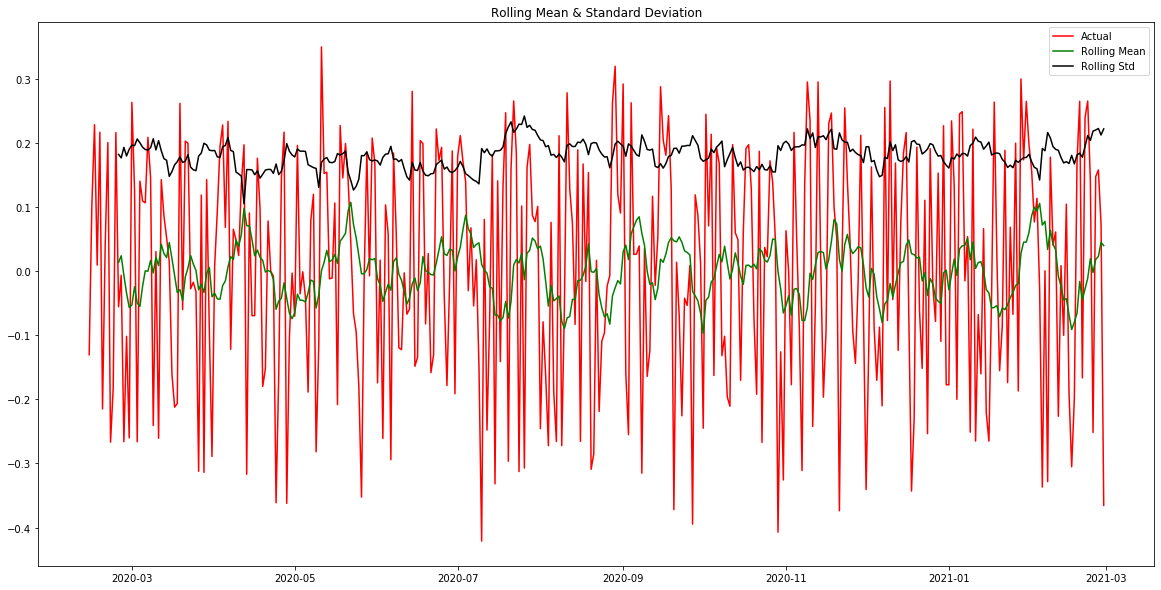

Dickey-Fuller Test: 
Test Statistic          -19.771995
p-value                   0.000000
Lags Used                 0.000000
No. of Obs              380.000000
Critical Value (1%)      -3.447676
Critical Value (5%)      -2.869176
Critical Value (10%)     -2.570838
dtype: float64


In [14]:
stationarity(data_log_diff)

- Checking for Trend stationarity and performing exponential transformation on our data

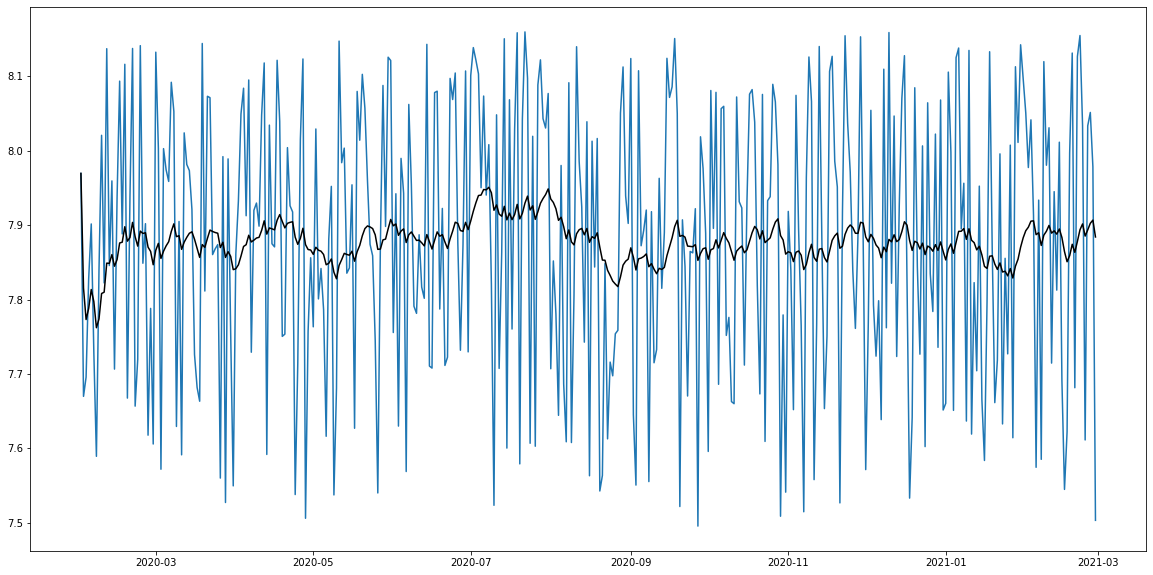

In [15]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

- Since log transformation is non-stationary, applying differencing on our data.

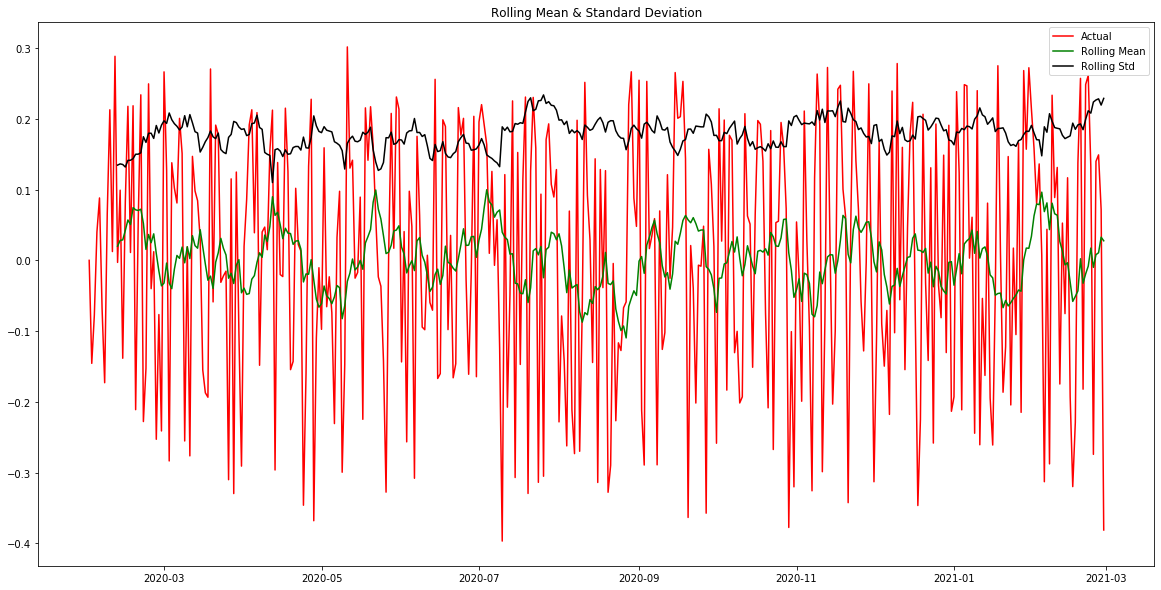

Dickey-Fuller Test: 
Test Statistic          -20.700987
p-value                   0.000000
Lags Used                 0.000000
No. of Obs              393.000000
Critical Value (1%)      -3.447099
Critical Value (5%)      -2.868923
Critical Value (10%)     -2.570703
dtype: float64


In [16]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

- From above graph and ADF test, we conclude, it is trend stationary

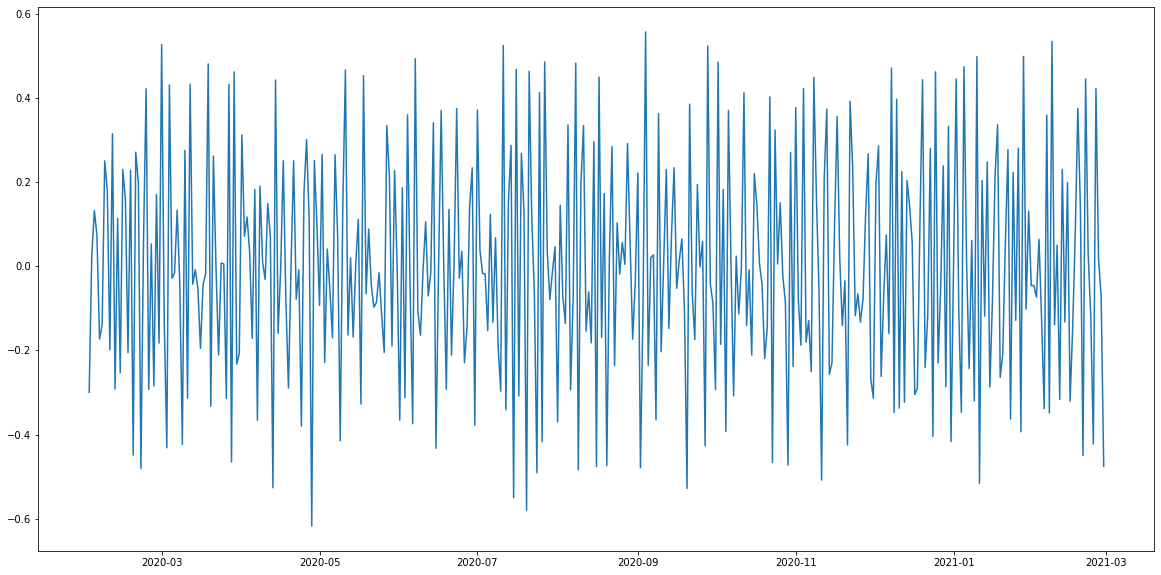

In [17]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

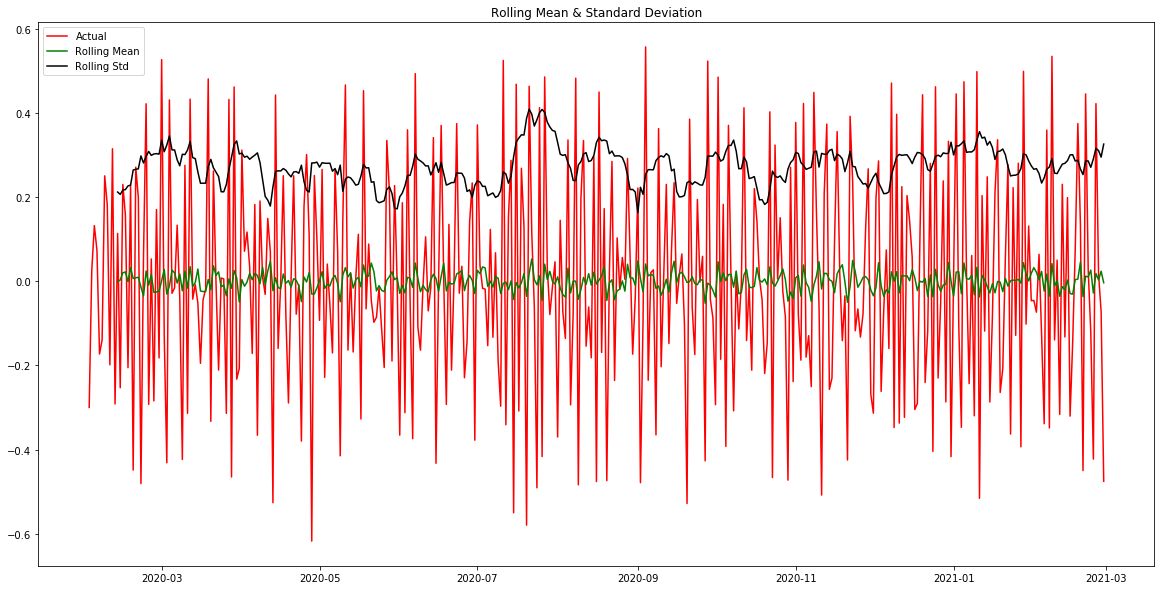

Dickey-Fuller Test: 
Test Statistic         -9.549181e+00
p-value                 2.599589e-16
Lags Used               1.300000e+01
No. of Obs              3.790000e+02
Critical Value (1%)    -3.447722e+00
Critical Value (5%)    -2.869196e+00
Critical Value (10%)   -2.570849e+00
dtype: float64


In [18]:
data_shift=data_shift.dropna()
stationarity(data_shift)

- Decomposing Time Series into its components : Trend, Seasonality and Residual

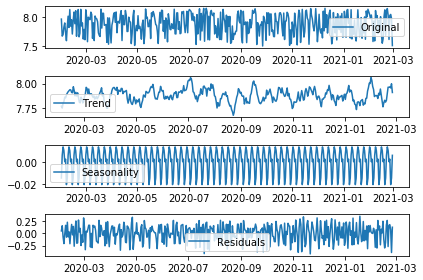

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- Checking the stationarity of Time Series components

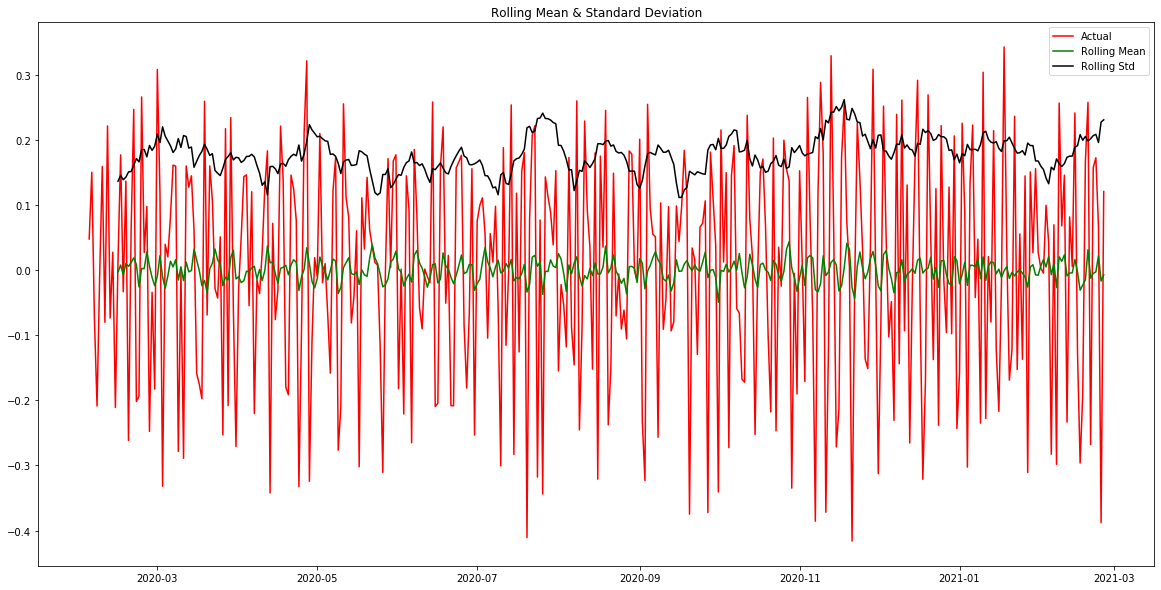

Dickey-Fuller Test: 
Test Statistic         -9.237015e+00
p-value                 1.620203e-15
Lags Used               1.700000e+01
No. of Obs              3.700000e+02
Critical Value (1%)    -3.448148e+00
Critical Value (5%)    -2.869383e+00
Critical Value (10%)   -2.570948e+00
dtype: float64


In [20]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

- Plotting the ACF and PACF to find q and p value
- We got q and p both 2 from the graph

Text(0.5, 1.0, 'Partial Autocorrelation Function')

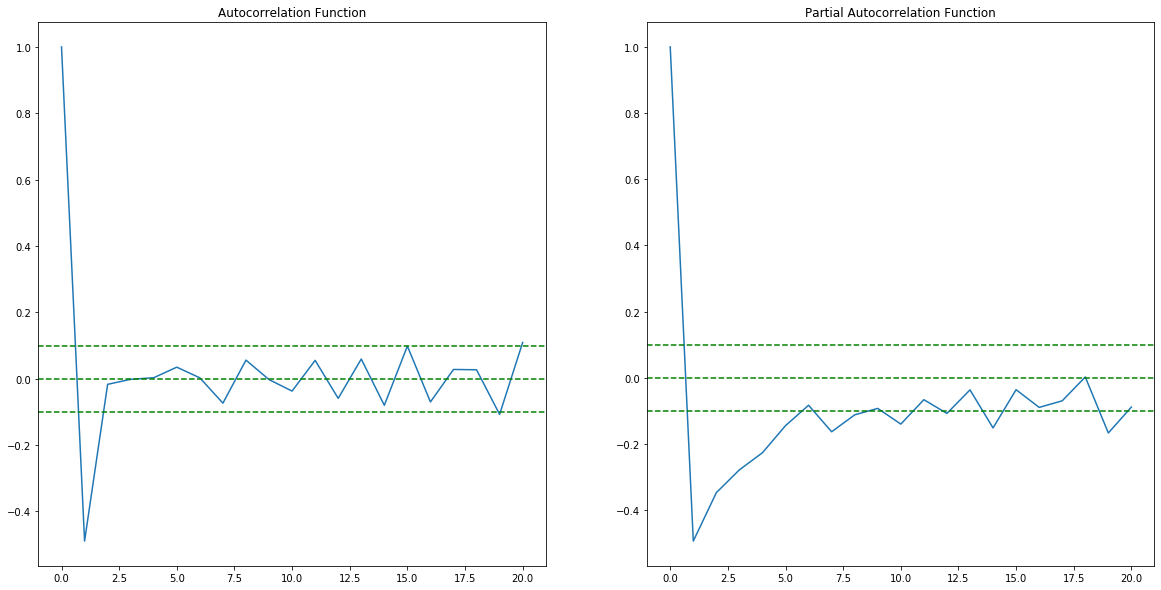

In [21]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

- Building the ARIMA model with p=2, q=2 and I=1

D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


plotting ARIMA model


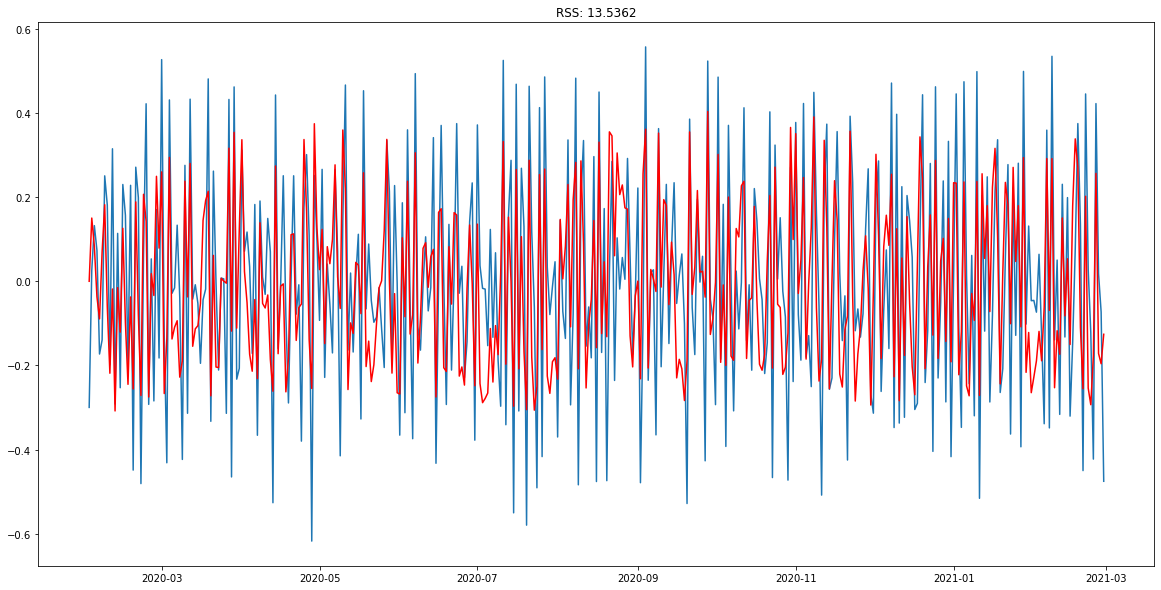

In [22]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['weight'])**2))
print('plotting ARIMA model')

- Predicted values from ARIMA model in difference form

In [23]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

date
2020-02-02   -0.000021
2020-02-03    0.150275
2020-02-04    0.083398
2020-02-05   -0.036982
2020-02-06   -0.089422
dtype: float64


- Performing Inverse Transformation for differencing, by doing cumulative sum

In [24]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

date
2020-02-02   -0.000021
2020-02-03    0.150255
2020-02-04    0.233653
2020-02-05    0.196671
2020-02-06    0.107249
dtype: float64


- Below is data display of predicted value in log scale

In [25]:
predictions_log=pd.Series(data_log['weight'].ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

date
2020-02-01    7.969704
2020-02-02    7.969683
2020-02-03    8.119958
2020-02-04    8.203356
2020-02-05    8.166374
dtype: float64

Taking out log transformation and visualizing actual vs predicted value graph

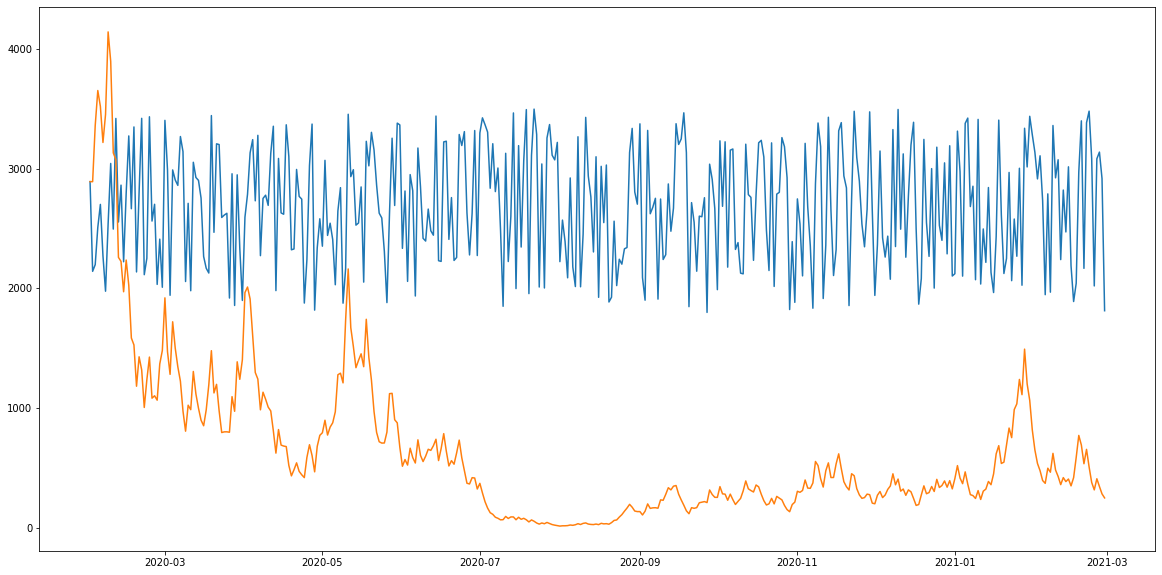

In [26]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

- Plotting the visual for forecast of next 10 years with 95% confidence interval

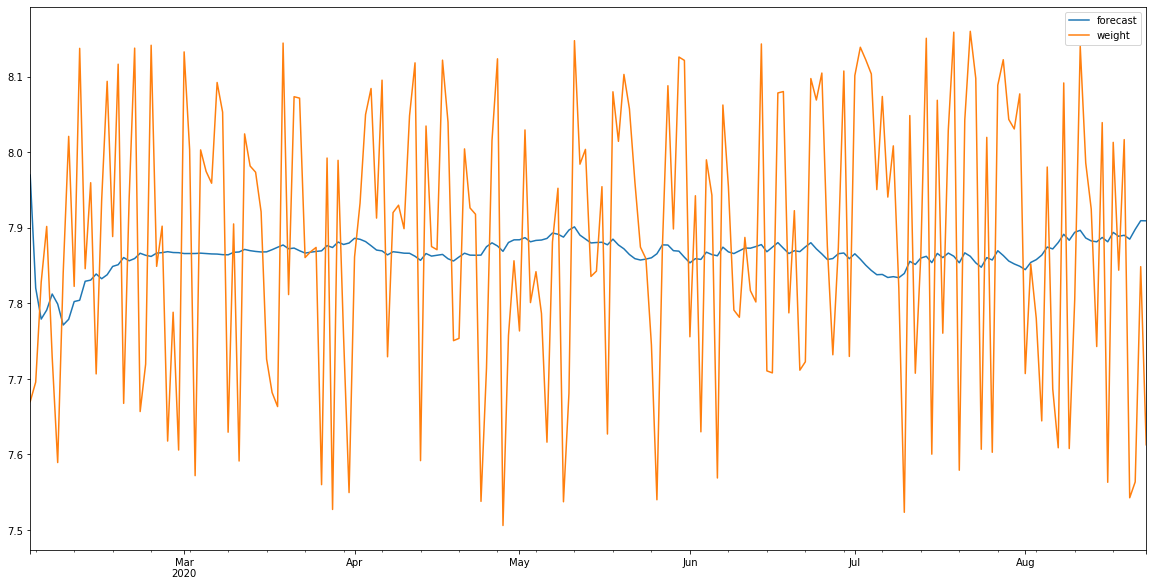

In [27]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

- Next 10 years predicted value on log scale

In [28]:
x[0]

array([7.87029013, 7.87133015, 7.87209633, 7.87278183, 7.873395  ,
       7.87394325, 7.87443322, 7.87487089, 7.87526161, 7.8756102 ,
       7.87592096, 7.87619778, 7.87644413, 7.87666312, 7.87685757,
       7.87702999, 7.87718263, 7.87731752, 7.87743647, 7.87754113,
       7.87763295, 7.87771325, 7.87778321, 7.87784389, 7.87789623,
       7.8779411 , 7.87797926, 7.87801139, 7.87803812, 7.87805999,
       7.87807751, 7.87809112, 7.87810121, 7.87810816, 7.87811228,
       7.87811387, 7.87811317, 7.87811043, 7.87810586, 7.87809963,
       7.87809193, 7.87808291, 7.87807269, 7.8780614 , 7.87804916,
       7.87803605, 7.87802217, 7.87800759, 7.8779924 , 7.87797664,
       7.87796038, 7.87794367, 7.87792656, 7.87790909, 7.87789129,
       7.87787319, 7.87785484, 7.87783625, 7.87781744, 7.87779845,
       7.87777929, 7.87775997, 7.87774052, 7.87772095, 7.87770126,
       7.87768148, 7.8776616 , 7.87764165, 7.87762162, 7.87760153,
       7.87758138, 7.87756118, 7.87754094, 7.87752065, 7.87750

- Actual predicted value for next 10 years, after taking out log transformation

In [29]:
np.exp(x[0])

array([2618.32513321, 2621.04964932, 2623.05861886, 2624.85734788,
       2626.46732519, 2627.90767242, 2629.19559389, 2630.34656516,
       2631.37450352, 2632.29192242, 2633.11007102, 2633.83906027,
       2634.48797681, 2635.06498559, 2635.57742258, 2636.0318782 ,
       2636.43427255, 2636.78992313, 2637.10360584, 2637.37960981,
       2637.62178681, 2637.83359567, 2638.01814217, 2638.178215  ,
       2638.31631798, 2638.43469916, 2638.5353768 , 2638.62016285,
       2638.69068402, 2638.74840062, 2638.79462362, 2638.83052984,
       2638.85717571, 2638.87550956, 2638.88638265, 2638.89055911,
       2638.88872485, 2638.88149557, 2638.86942392, 2638.85300598,
       2638.83268703, 2638.80886674, 2638.78190387, 2638.75212043,
       2638.71980545, 2638.68521837, 2638.64859204, 2638.61013547,
       2638.57003627, 2638.52846282, 2638.48556627, 2638.44148226,
       2638.39633255, 2638.35022645, 2638.30326203, 2638.25552734,
       2638.20710141, 2638.15805517, 2638.10845228, 2638.05834

<b>*************************End****************************</b>